# **4. Aциклично опструјавање цилиндра**

Детаљна објашњења и извођења се могу наћи у овом [видео материјалу.](https://vimeo.com/487335929)

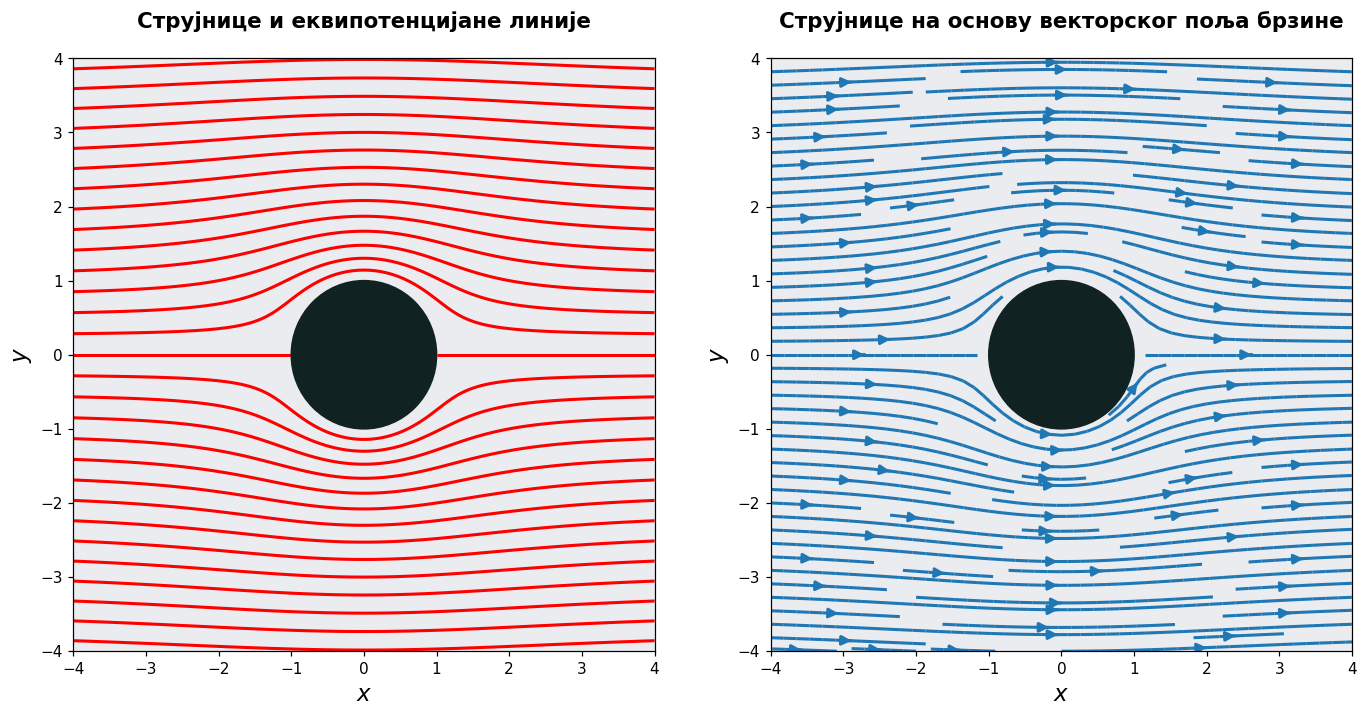

In [20]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = '#EBECF0' # светло сива позадина дијаграма

Nx = 401
Ny = 401
x = np.linspace(-4, 4, Nx)
y = np.linspace(-4, 4, Ny)
X,Y = np.meshgrid(x,y)

Uinf = 1 
R = 1

z = X + 1j*Y
interior = X**2 + Y**2 < R
z[interior] = np.ma.masked
w = Uinf*(z + R**2/z)
phi = w.real
psi = w.imag

U = Uinf*(1 - R**2/z**2)
u = U.real
v = -U.imag

psi_i = np.linspace(-4, 4, 31)
phi_i = np.linspace(-4, 4, 21)

plt.figure(figsize=(15, 7), dpi=110)
plt.subplots_adjust(hspace=1)

# Први дијаграм - струјнице и еквипотенцијалне линије
fig1 = plt.subplot(1,2,1)
plt.title("Струјнице и еквипотенцијане линије", fontsize=14, pad = 20, weight='bold')
strujnice = fig1.contour(X,Y, psi, levels = psi_i, linewidths=2, colors='red', linestyles='solid')
#ekvipotencijalne_linije = plt.contour(X,Y, phi, levels = phi_i, linewidths=1.75, linestyles='dashed', colors='black')
plt.xlabel("$x$", fontsize=15)
plt.ylabel("$y$", fontsize=15)
circle = plt.Circle((0,0), radius=R, color='#112222', zorder = 2)
plt.gca().add_patch(circle)


fig2 = plt.subplot(1,2,2)
plt.title("Струјнице на основу векторског поља брзине", fontsize=14, pad = 20, weight='bold')
fig2.streamplot(X, Y, u, v, density=[1.5], linewidth=2, arrowsize = 1.25)
#fig2.contour(X,Y, psi, levels=[0], colors='red', linewidths=3, linestyles='solid')
plt.xlabel("$x$", fontsize=15)
plt.ylabel("$y$", fontsize=15)
circle = plt.Circle((0,0), radius=R, color='#112222', zorder = 2)
plt.gca().add_patch(circle)

Расподела интензитета брзине и коефијента притиска у струјном пољу.

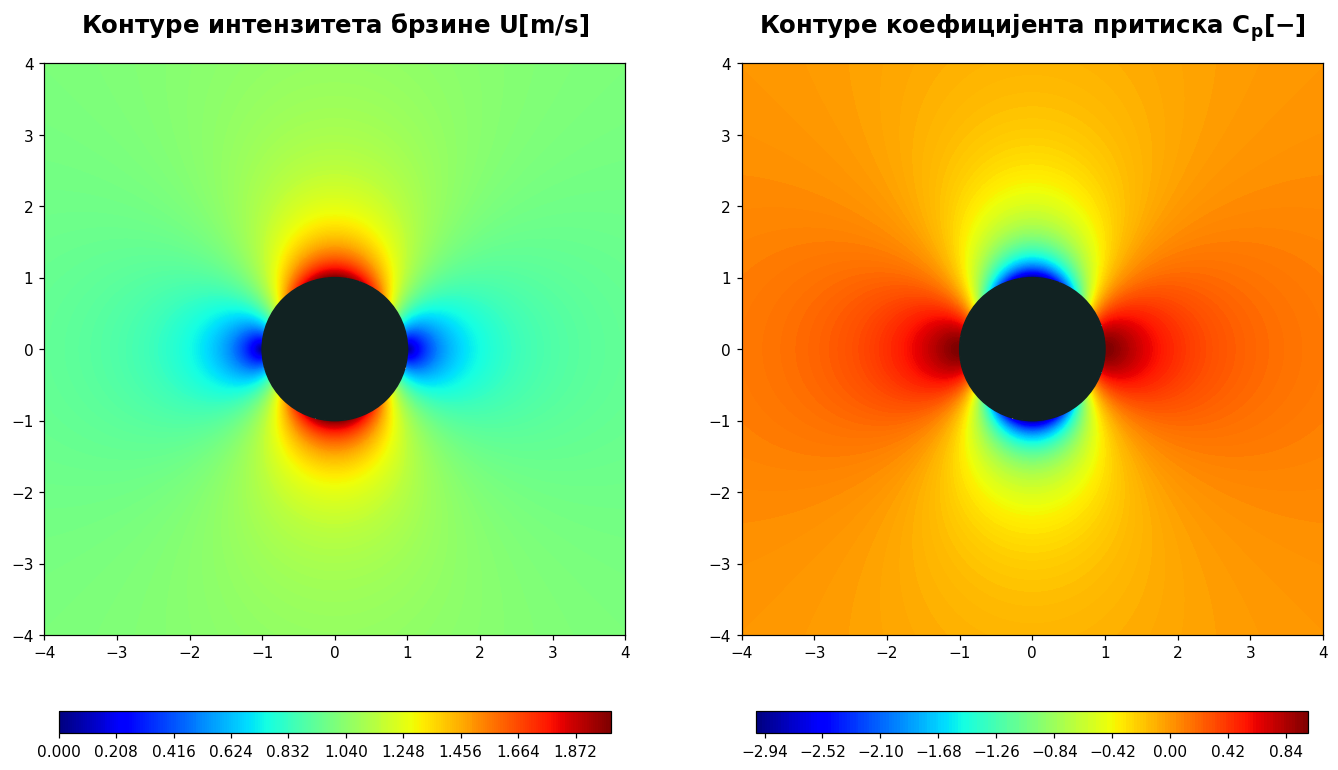

In [21]:
U = np.sqrt(u**2 + v**2)
Cp = 1 - (u**2 + v**2)/Uinf**2


plt.figure(figsize=(15, 9), dpi=110)
plt.subplots_adjust(hspace=1)
fig1 = plt.subplot(1,2,1)
plt.title("Контуре интензитета брзине $\mathbf{U[\mathbf{m/s}]}$", fontsize=16, pad = 20, weight='bold')
plt.contourf(X,Y, U, levels = 256, cmap='jet')
cbar=plt.colorbar(orientation='horizontal', shrink = 0.95, aspect =25, pad =0.1)
#cbar.set_label("$U [\mathrm{m/s}]$", size = 14, labelpad =30)
cbar.ax.tick_params(labelsize=10)
circle = plt.Circle((0,0), radius=R, color='#112222', zorder = 2)
plt.gca().add_patch(circle)


fig2 = plt.subplot(1,2,2)
plt.title("Контуре коефицијента притиска $\mathbf{C_p [-]}$", fontsize=16, pad = 20, weight='bold')
plt.contourf(X,Y, Cp, levels = 256, cmap='jet')
cbar=plt.colorbar(orientation='horizontal', shrink = 0.95, aspect =25, pad =0.1)
#cbar.set_label("$C_p [-]$", size = 14, labelpad =30)
cbar.ax.tick_params(labelsize=10)
circle = plt.Circle((0,0), radius=R, color='#112222', zorder = 2)
plt.gca().add_patch(circle)